In [48]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt 
from pyMCDS import pyMCDS
from scipy.integrate import odeint

In [49]:
v = 1/60/60 # division rate per min
p = 0.8 # probabilty stays stem cell after division
t_total = 14400 # time min

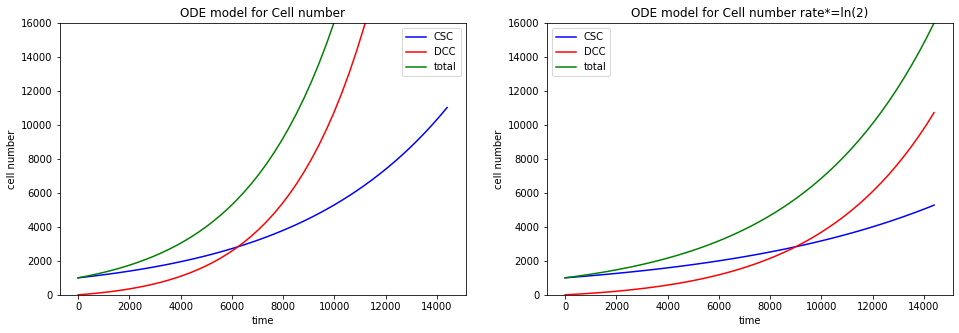

In [50]:
# ODE model

def model(z,t):
    dxdt =   v*z[0]*(2*p-1)
    dydt = 2*v*z[0]*(1-p)  + v*z[1]
    dzdt = [dxdt,dydt]
    return dzdt
# initial condition
z0 = [1000,0]
# time points
t = np.linspace(0,t_total)
# solve ODE
z = odeint(model,z0,t)
plt.figure(figsize=(16,5))
# plot results
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.plot(t,z[:,0],'b-',label=r'CSC')
    plt.plot(t,z[:,1],'r-',label=r'DCC')
    plt.plot(t,z[:,1]+z[:,0],'g-',label=r'total')
    plt.ylabel('cell number')
    plt.xlabel('time')
    plt.legend(loc='best')
    plt.ylim(0,16000) 
    if i ==0:
        plt.title('ODE model for Cell number')
    else:
        plt.title('ODE model for Cell number rate*=ln(2)')
    v = v*np.log(2)
    z = odeint(model,z0,t)   
plt.show()

In [51]:
z[-1]

array([3167.95805498, 3665.37162328])

In [5]:
direc_lst    = ('C:\\Users\zeXal\Desktop\stem_cells_paul _yushang\stem_cells-master\output_fix_10_60_1',
                'C:\\Users\zeXal\Desktop\stem_cells_paul _yushang\stem_cells-master\output_sto_10_60',
                'C:\\Users\zeXal\Desktop\stem_cells_paul _yushang\stem_cells-master\output_sto_10_60_2',
                'C:\\Users\zeXal\Desktop\stem_cells_paul _yushang\stem_cells-master\output_sto_10_60_3')
type1_matrix = np.zeros((len(direc_lst),41))
type2_matrix = np.zeros((len(direc_lst),41))
type3_matrix = np.zeros((len(direc_lst),41))
time_matrix  = np.zeros((len(direc_lst),41))

In [6]:
for j in range(len(direc_lst)):    
    for i in range(1,41):
        if i>=10:
            new_str = str(i);
        else:
            new_str = '0'+str(i)
        my_str = 'output000000'+new_str +'.xml'
        mcds = pyMCDS(my_str,direc_lst[j])
        all_type = mcds.data['discrete_cells']['cell_type']
        type1_matrix[j][i] = sum(all_type==1)
        type2_matrix[j][i] = sum(all_type==2)
        time_matrix[j][i]  = mcds.get_time()

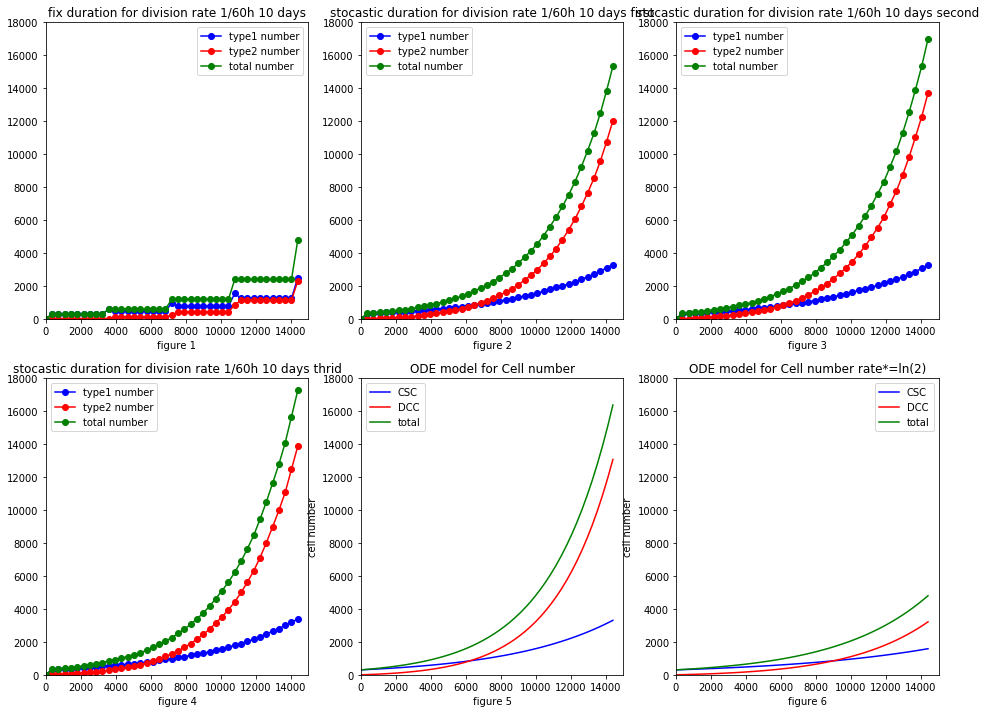

In [47]:
plt.figure(figsize=(16,12))
title_lst = ('fix duration for division rate 1/60h 10 days',
             'stocastic duration for division rate 1/60h 10 days first',
             'stocastic duration for division rate 1/60h 10 days second',
             'stocastic duration for division rate 1/60h 10 days thrid')
for i in range(4):
    plt.subplot(2,3,i+1)
    plt.plot(time_matrix[i,:],type1_matrix[i,:],'bo-',label='type1 number')
    plt.plot(time_matrix[i,:],type2_matrix[i,:],'ro-',label='type2 number')
    plt.plot(time_matrix[i,:],type2_matrix[i,:]+type1_matrix[i,:],'go-',label='total number')
    plt.legend()
    plt.title(title_lst[i])
    plt.xlim(0, 15000)
    plt.xlabel('figure {}'.format(i+1))
    plt.ylim(0,18000)
v = 1/60/60 # division rate per min
p = 0.8 # probabilty stays stem cell after division
t_total = 14400 # time min
for i in range(2):
    z = odeint(model,z0,t)
    plt.subplot(2,3,i+5)
    plt.plot(t,z[:,0],'b-',label=r'CSC')
    plt.plot(t,z[:,1],'r-',label=r'DCC')
    plt.plot(t,z[:,1]+z[:,0],'g-',label=r'total')
    plt.ylabel('cell number')
    plt.xlabel('figure {}'.format(i+5))
    plt.legend(loc='best')
    plt.xlim(0, 15000)
    plt.ylim(0,18000) 
    if i ==0:
        plt.title('ODE model for Cell number')
    else:
        plt.title('ODE model for Cell number rate*=ln(2)')
    v = v*np.log(2)

Figure 1 is the fixed duration for average duration 60 hours = 3600mins and totoal time for 10 days = 14400 mins.

Figure 2,3,4 are the is the stochastic duration for average duration 60 hours = 3600mins and totoal time for 10 days = 14400 mins.

Figure 5 is the ode model as professor lowengrub derive last time.

Figure 6 is the preious ode model which I multiply the division rate by Ln(2).

From 1,6， we can see that fixed duation is pretty agree with the ode model which division rate multiply by Ln(2).

From 2,3,4 vs 5 we can see that stochastic duration model are pretty agree with the model derived before.

I'm a little confused about those results. Could you help me with these?